# Algoritma Prim


Execution Time of Prim's Algorithm: 0.0 seconds

Total Memory Usage (KB): 619280.0


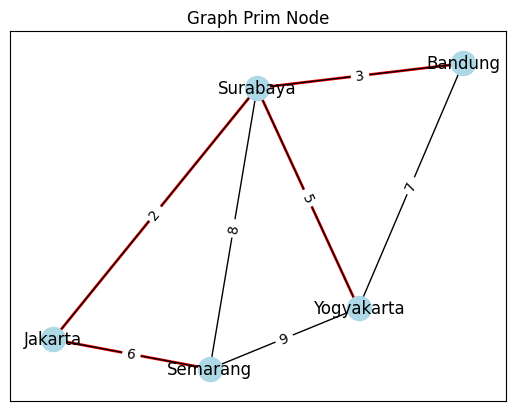


Edge 	Weight
Jakarta - Surabaya 	 2
Surabaya - Bandung 	 3
Jakarta - Semarang 	 6
Surabaya - Yogyakarta 	 5


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil

def minKey(key, mstSet, start_time, memory_usage):
  min = float('inf')
  for v in range(len(key)):
    if key[v] < min and mstSet[v] is False:
      min = key[v]
      min_index = v

  current_time = time.time() - start_time
  current_memory_usage = psutil.Process().memory_info().rss / 1024
  memory_usage.append((current_time, current_memory_usage))

  return min_index

def primMST(graph):
  start_time = time.time()
  memory_usage = []

  key = [float('inf')] * len(graph)
  parent = [None] * len(graph)
  key[0] = 0
  mstSet = [False] * len(graph)

  parent[0] = -1

  for cout in range(len(graph)):
    u = minKey(key, mstSet, start_time, memory_usage)
    mstSet[u] = True

    for v in range(len(graph)):
      if graph[u][v] > 0 and mstSet[v] is False and key[v] > graph[u][v]:
        key[v] = graph[u][v]
        parent[v] = u

  end_time = time.time()
  elapsed_time = end_time - start_time

  print("\nExecution Time of Prim's Algorithm:", elapsed_time, "seconds")

  total_memory = 0
  for i, (time_val, mem_val) in enumerate(memory_usage, 1):
    total_memory += mem_val

  print("\nTotal Memory Usage (KB):", total_memory)
  return parent

def printMST(parent, graph):
  print("\nEdge \tWeight")
  for i in range(1, len(graph)):
    print(cities[parent[i]], "-", cities[i], "\t", graph[i][parent[i]])

G = nx.Graph()
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Yogyakarta']

G.add_edge(cities[0], cities[1], weight=2)
G.add_edge(cities[0], cities[3], weight=6)
G.add_edge(cities[1], cities[2], weight=3)
G.add_edge(cities[1], cities[3], weight=8)
G.add_edge(cities[1], cities[4], weight=5)
G.add_edge(cities[2], cities[4], weight=7)
G.add_edge(cities[3], cities[4], weight=9)

pos = nx.spring_layout(G)

graph = [[0, 2, 0, 6, 0],
     [2, 0, 3, 8, 5],
     [0, 3, 0, 0, 7],
     [6, 8, 0, 0, 9],
     [0, 5, 7, 9, 0]]

parent = primMST(graph)
edges = [(cities[parent[i]], cities[i]) for i in range(1, len(graph))]

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Prim Node")
plt.show()

printMST(parent, graph)


*1. Import modul yang dibutuhkan*

python
import networkx as nx
import matplotlib.pyplot as plt


*Penjelasan:*

Baris ini mengimport dua modul yang dibutuhkan untuk program: `networkx` dan `matplotlib.pyplot`. Modul `networkx` digunakan untuk membuat dan memanipulasi grafik, sedangkan modul `matplotlib.pyplot` digunakan untuk memvisualisasikan grafik.

*2. Definisi fungsi minKey*

python
def minKey(key, mstSet):
    min = float('inf')
    for v in range(len(key)):
        if key[v] < min and mstSet[v] == False:
            min = key[v]
            min_index = v
    return min_index


*Penjelasan:*

Fungsi ini digunakan untuk mencari bobot minimum yang belum ditambahkan ke MST. Fungsi ini mengambil dua parameter: `key` dan `mstSet`. Parameter `key` adalah daftar yang berisi bobot minimum untuk setiap simpul, sedangkan parameter `mstSet` adalah daftar yang berisi informasi apakah simpul telah ditambahkan ke MST atau belum.

Fungsi ini mengembalikan indeks simpul yang memiliki bobot minimum yang belum ditambahkan ke MST.

*Penjelasan baris per baris:*

* Baris pertama menginisialisasi variabel `min` dengan nilai infinity.
* Baris kedua hingga baris ke-11 mengulang untuk setiap simpul `v`.
* Baris ketiga hingga baris ke-4 membandingkan bobot simpul `v` dengan bobot minimum `min`. Jika bobot simpul `v` lebih kecil dari `min` dan simpul `v` belum ditambahkan ke MST, maka nilai `min` dan `min_index` diperbarui.
* Baris ke-12 mengembalikan indeks simpul `v`.

*3. Definisi fungsi primMST*

python
def primMST(graph):
    key = [float('inf')] * len(graph)
    parent = [None] * len(graph)
    key[0] = 0
    mstSet = [False] * len(graph)

    parent[0] = -1

    for cout in range(len(graph)):
        u = minKey(key, mstSet)
        mstSet[u] = True

        for v in range(len(graph)):
            if graph[u][v] > 0 and mstSet[v] == False and key[v] > graph[u][v]:
                key[v] = graph[u][v]
                parent[v] = u

    printMST(parent, graph)


*Penjelasan:*

Fungsi ini digunakan untuk membuat dan mencetak MST menggunakan algoritma Prim. Fungsi ini mengambil satu parameter: `graph`. Parameter `graph` adalah matriks adjacency yang mewakili grafik.

Fungsi ini pertama-tama menginisialisasi daftar `key`, `parent`, dan `mstSet`. Daftar `key` berisi bobot minimum untuk setiap simpul, daftar `parent` berisi simpul induk untuk setiap simpul, dan daftar `mstSet` berisi informasi apakah simpul telah ditambahkan ke MST atau belum.

Selanjutnya, fungsi ini mengulang sebanyak jumlah simpul dalam grafik. Pada setiap iterasi, fungsi ini mencari simpul yang memiliki bobot minimum yang belum ditambahkan ke MST menggunakan fungsi `minKey`. Simpul ini kemudian ditambahkan ke MST dan bobot minimum untuk simpul tetangga diperbarui.

Terakhir, fungsi ini mencetak MST ke layar.

*Penjelasan baris per baris:*

* Baris pertama hingga baris ke-7 menginisialisasi daftar `key`, `parent`, dan `mstSet`.
* Baris ke-8 menginisialisasi simpul induk simpul pertama dengan nilai -1.
* Baris ke-9 hingga baris ke-23 mengulang sebanyak jumlah simpul dalam grafik.
* Baris ke-10 menggunakan fungsi `minKey` untuk mencari simpul yang memiliki bobot minimum yang belum ditambahkan ke MST.
* Baris ke-11 menambahkan simpul ini ke MST.
* Baris ke-12 hingga baris ke-22 memperbarui bobot minimum untuk simpul tetangga simpul yang baru ditambahkan.
* Baris ke-24 mencetak MST.

# Algoritma Kruskal

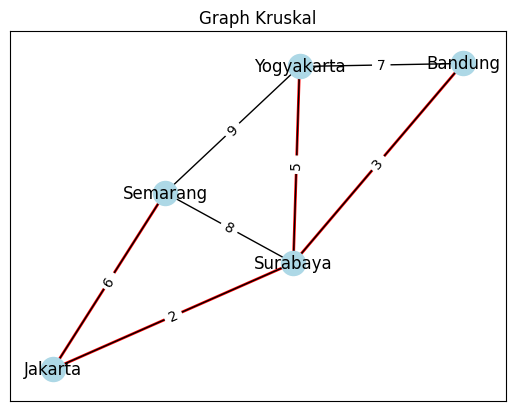


Edge 	Weight
Jakarta - Surabaya 	 2
Surabaya - Bandung 	 3
Surabaya - Yogyakarta 	 5
Jakarta - Semarang 	 6


In [9]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil

start_time = time.time()
memory_usage = []

def kruskalMST(graph):
    edges = [(edge[0], edge[1], edge[2]['weight']) for edge in graph.edges(data=True)]
    edges.sort(key=lambda x: x[2])
    mst = []
    parent = {node: node for node in graph.nodes()}
    rank = {node: 0 for node in graph.nodes()}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    for i, edge in enumerate(edges, 1):
        node1, node2, weight = edge
        if find(node1) != find(node2):
            union(node1, node2)
            mst.append(edge)
            
            current_time = time.time() - start_time
            current_memory_usage = psutil.Process().memory_info().rss / 1024  # in kilobytes
            memory_usage.append(current_memory_usage)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    total_memory = 0
    for i, mem in enumerate(memory_usage):
        total_memory += mem

    return mst

def printMST(mst):
    print("\nEdge \tWeight")
    for edge in mst:
        print(edge[0], "-", edge[1], "\t", edge[2])

G = nx.Graph()
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Yogyakarta']

G.add_edge(cities[0], cities[1], weight=2)
G.add_edge(cities[0], cities[3], weight=6)
G.add_edge(cities[1], cities[2], weight=3)
G.add_edge(cities[1], cities[3], weight=8)
G.add_edge(cities[1], cities[4], weight=5)
G.add_edge(cities[2], cities[4], weight=7)
G.add_edge(cities[3], cities[4], weight=9)

pos = nx.spring_layout(G)

mst = kruskalMST(G)
mst_edges = [(edge[0], edge[1]) for edge in mst]

nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='r', width=2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Kruskal")
plt.show()

printMST(mst)


Membuat List Edges:

Mengambil semua tepi dari graf dan membuat list edges yang berisi tuple (node1, node2, weight) dari setiap tepi.
Mengurutkan Edges:

Mengurutkan list edges berdasarkan bobotnya dari yang terkecil ke yang terbesar.
Inisialisasi:

Inisialisasi list mst untuk menyimpan MST.
Inisialisasi struktur data disjoint-set, yaitu parent (mengidentifikasi set mana suatu node menjadi anggota) dan rank (menyimpan tingkat kedalaman pohon).
Fungsi Find dan Union:

Fungsi find digunakan untuk mencari himpunan (set) dari suatu node dengan menggunakan teknik path compression untuk mempercepat operasi find.
Fungsi union digunakan untuk menggabungkan dua himpunan dengan memperhatikan tingkat kedalaman (rank) untuk mengoptimalkan struktur pohon.
Iterasi dan Membangun MST:

Iterasi melalui list edges yang sudah diurutkan.
Periksa apakah node-node yang terhubung oleh tepi tersebut berada dalam himpunan yang sama dengan menggunakan fungsi find.
Jika tidak, gabungkan himpunan tersebut dengan menggunakan fungsi union dan tambahkan tepi tersebut ke dalam MST (mst).
print MST:


# 8

# PRIM 8 NODE

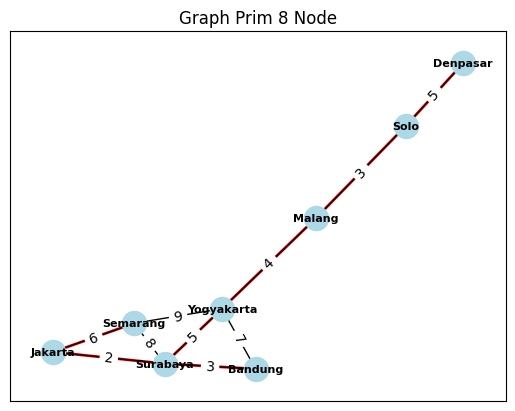


Edge 	Weight
Jakarta - Surabaya	2
Surabaya - Bandung	3
Jakarta - Semarang	6
Surabaya - Yogyakarta	5
Yogyakarta - Malang	4
Malang - Solo	3
Solo - Denpasar	5


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil

def minKey(key, mstSet, start_time, memory_usage):
    min_val = float('inf')
    for v in range(len(key)):
        if key[v] < min_val and not mstSet[v]:
            min_val = key[v]
            min_index = v

    current_time = time.time() - start_time
    current_memory_usage = psutil.Process().memory_info().rss / 1024  # in kilobytes
    memory_usage.append((current_time, current_memory_usage))
    
    return min_index

def primMST(graph, cities):
    start_time = time.time()
    memory_usage = []

    key = [float('inf')] * len(graph)
    parent = [None] * len(graph)
    key[0] = 0
    mstSet = [False] * len(graph)

    parent[0] = -1

    for count in range(len(graph)):
        u = minKey(key, mstSet, start_time, memory_usage)
        mstSet[u] = True

        for v in range(len(graph)):
            if graph[u][v] > 0 and not mstSet[v] and key[v] > graph[u][v]:
                key[v] = graph[u][v]
                parent[v] = u

    end_time = time.time()
    elapsed_time = end_time - start_time

    total_memory = 0
    for i, (time_val, mem_val) in enumerate(memory_usage, 1):
        total_memory += mem_val

    return parent

def printMST(parent, graph, cities):
    print("\nEdge \tWeight")
    for i in range(1, len(graph)):
        print(f"{cities[parent[i]]} - {cities[i]}\t{graph[i][parent[i]]}")

G = nx.Graph()
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Yogyakarta', 'Malang', 'Solo', 'Denpasar']

edges = [
    ('Jakarta', 'Surabaya', 2),
    ('Jakarta', 'Semarang', 6),
    ('Surabaya', 'Bandung', 3),
    ('Surabaya', 'Semarang', 8),
    ('Surabaya', 'Yogyakarta', 5),
    ('Bandung', 'Yogyakarta', 7),
    ('Semarang', 'Yogyakarta', 9),
    ('Yogyakarta', 'Malang', 4),
    ('Malang', 'Solo', 3),
    ('Solo', 'Denpasar', 5)
]

G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)

graph = [
    [0, 2, 0, 6, 0, 0, 0, 0],
    [2, 0, 3, 8, 5, 0, 0, 0],
    [0, 3, 0, 0, 7, 0, 0, 0],
    [6, 8, 0, 0, 9, 0, 0, 0],
    [0, 5, 7, 9, 0, 4, 0, 0],
    [0, 0, 0, 0, 4, 0, 3, 0],
    [0, 0, 0, 0, 0, 3, 0, 5],
    [0, 0, 0, 0, 0, 0, 5, 0]
]

parent = primMST(graph, cities)
edges = [(cities[parent[i]], cities[i]) for i in range(1, len(graph))]

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Prim 8 Node")
plt.show()

printMST(parent, graph, cities)


# KRUSKAL 8 NODE

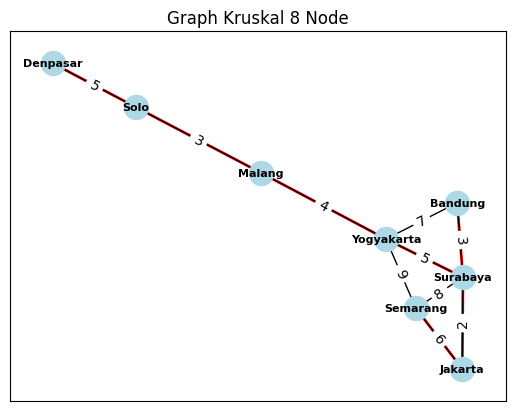


Edge 	Weight
Jakarta - Surabaya 	 2
Surabaya - Bandung 	 3
Malang - Solo 	 3
Yogyakarta - Malang 	 4
Surabaya - Yogyakarta 	 5
Solo - Denpasar 	 5
Jakarta - Semarang 	 6


In [11]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil

start_time = time.time()
memory_usage = []

def kruskalMST(graph):
    edges = [(edge[0], edge[1], edge[2]['weight']) for edge in graph.edges(data=True)]
    edges.sort(key=lambda x: x[2])
    mst = []
    parent = {node: node for node in graph.nodes()}
    rank = {node: 0 for node in graph.nodes()}

    def find(node):
        if parent[node] != node:
            parent[node] = find(parent[node])
        return parent[node]

    def union(node1, node2):
        root1 = find(node1)
        root2 = find(node2)
        if root1 != root2:
            if rank[root1] > rank[root2]:
                parent[root2] = root1
            else:
                parent[root1] = root2
                if rank[root1] == rank[root2]:
                    rank[root2] += 1

    for i, edge in enumerate(edges, 1):
        node1, node2, weight = edge
        if find(node1) != find(node2):
            union(node1, node2)
            mst.append(edge)
            
            current_time = time.time() - start_time
            current_memory_usage = psutil.Process().memory_info().rss / 1024  # in kilobytes
            memory_usage.append(current_memory_usage)

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    total_memory = 0
    for i, mem in enumerate(memory_usage, 1):
        total_memory += mem

    return mst

def printMST(mst):
    print("\nEdge \tWeight")
    for edge in mst:
        print(edge[0], "-", edge[1], "\t", edge[2])

G = nx.Graph()
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Yogyakarta', 'Malang', 'Solo', 'Denpasar']

edges = [
    ('Jakarta', 'Surabaya', 2),
    ('Jakarta', 'Semarang', 6),
    ('Surabaya', 'Bandung', 3),
    ('Surabaya', 'Semarang', 8),
    ('Surabaya', 'Yogyakarta', 5),
    ('Bandung', 'Yogyakarta', 7),
    ('Semarang', 'Yogyakarta', 9),
    ('Yogyakarta', 'Malang', 4),
    ('Malang', 'Solo', 3),
    ('Solo', 'Denpasar', 5)
]

G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)

mst = kruskalMST(G)
mst_edges = [(edge[0], edge[1]) for edge in mst]

nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='r', width=2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Kruskal 8 Node")
plt.show()

printMST(mst)


## Graph Prim Padat 

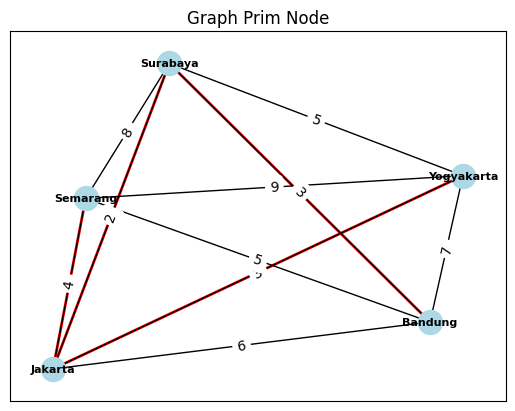


Edge 	Weight
Jakarta - Surabaya	2
Surabaya - Bandung	3
Jakarta - Semarang	4
Jakarta - Yogyakarta	3

Waktu Eksekusi Algoritma Prim: 0.0 detik
Total Penggunaan Memori (KB): 572240.0


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil

def minKey(key, mstSet, start_time, memory_usage):
    min_val = float('inf')
    for v in range(len(key)):
        if key[v] < min_val and not mstSet[v]:
            min_val = key[v]
            min_index = v

    current_time = time.time() - start_time
    current_memory_usage = psutil.Process().memory_info().rss / 1024  # in kilobytes
    memory_usage.append((current_time, current_memory_usage))
    
    return min_index

def primMST(graph):
    start_time = time.time()
    memory_usage = []

    key = [float('inf')] * len(graph)
    parent = [None] * len(graph)
    key[0] = 0
    mstSet = [False] * len(graph)

    parent[0] = -1

    for count in range(len(graph)):
        u = minKey(key, mstSet, start_time, memory_usage)
        mstSet[u] = True

        for v in range(len(graph)):
            if graph[u][v] > 0 and not mstSet[v] and key[v] > graph[u][v]:
                key[v] = graph[u][v]
                parent[v] = u

    end_time = time.time()
    elapsed_time = end_time - start_time

    total_memory = 0
    for i, (time_val, mem_val) in enumerate(memory_usage, 1):
        total_memory += mem_val

    return parent, elapsed_time, total_memory

def printMST(parent, graph, cities):
    print("\nEdge \tWeight")
    for i in range(1, len(graph)):
        print(f"{cities[parent[i]]} - {cities[i]}\t{graph[i][parent[i]]}")

G = nx.Graph()
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Yogyakarta']

edges = [
    ('Jakarta', 'Surabaya', 2),
    ('Jakarta', 'Bandung', 6),
    ('Jakarta', 'Semarang', 4),
    ('Jakarta', 'Yogyakarta', 3),
    ('Surabaya', 'Bandung', 3),
    ('Surabaya', 'Semarang', 8),
    ('Surabaya', 'Yogyakarta', 5),
    ('Bandung', 'Semarang', 5),
    ('Bandung', 'Yogyakarta', 7),
    ('Semarang', 'Yogyakarta', 9)
]

G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)

graph = [
    [0, 2, 6, 4, 3],
    [2, 0, 3, 8, 5],
    [6, 3, 0, 5, 7],
    [4, 8, 5, 0, 9],
    [3, 5, 7, 9, 0]
]

parent, elapsed_time, total_memory = primMST(graph)
edges = [(cities[parent[i]], cities[i]) for i in range(1, len(graph))]

nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color='r', width=2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Prim Node")
plt.show()

printMST(parent, graph, cities)

print("\nWaktu Eksekusi Algoritma Prim:", elapsed_time, "detik")
print("Total Penggunaan Memori (KB):", total_memory)


## Graph Padat Kruskal

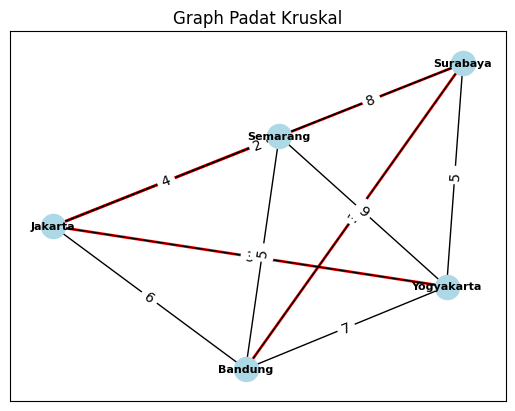


Waktu Eksekusi Algoritma Kruskal: 0.0006122589111328125 detik
Total Penggunaan Memori (KB): 462368.0


In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import time
import psutil

def find(subsets, i):
    if subsets[i] == -1:
        return i
    return find(subsets, subsets[i])

def union(subsets, x, y):
    root_x = find(subsets, x)
    root_y = find(subsets, y)
    subsets[root_x] = root_y

def kruskalMST(graph, cities):
    start_time = time.time()
    memory_usage = []

    edges = []
    for i in range(len(graph)):
        for j in range(i + 1, len(graph)):
            if graph[i][j] > 0:
                edges.append((i, j, graph[i][j]))

    edges = sorted(edges, key=lambda x: x[2])

    subsets = [-1] * len(graph)
    result = []

    for edge in edges:
        u, v, weight = edge
        root_u = find(subsets, u)
        root_v = find(subsets, v)

        if root_u != root_v:
            result.append((u, v, weight))
            union(subsets, root_u, root_v)
            
            current_time = time.time() - start_time
            current_memory_usage = psutil.Process().memory_info().rss / 1024  # in kilobytes
            memory_usage.append((current_time, current_memory_usage))

    end_time = time.time()
    elapsed_time = end_time - start_time
    
    total_memory = 0
    for i, (time_val, mem_val) in enumerate(memory_usage, 1):
        total_memory += mem_val

    return result, elapsed_time, total_memory

G = nx.Graph()
cities = ['Jakarta', 'Surabaya', 'Bandung', 'Semarang', 'Yogyakarta']

edges = [
    ('Jakarta', 'Surabaya', 2),
    ('Jakarta', 'Bandung', 6),
    ('Jakarta', 'Semarang', 4),
    ('Jakarta', 'Yogyakarta', 3),
    ('Surabaya', 'Bandung', 3),
    ('Surabaya', 'Semarang', 8),
    ('Surabaya', 'Yogyakarta', 5),
    ('Bandung', 'Semarang', 5),
    ('Bandung', 'Yogyakarta', 7),
    ('Semarang', 'Yogyakarta', 9)
]

G.add_weighted_edges_from(edges)

pos = nx.spring_layout(G)

graph = [
    [0, 2, 6, 4, 3],
    [2, 0, 3, 8, 5],
    [6, 3, 0, 5, 7],
    [4, 8, 5, 0, 9],
    [3, 5, 7, 9, 0]
]

mst, elapsed_time, total_memory = kruskalMST(graph, cities)
mst_edges = [(cities[edge[0]], cities[edge[1]]) for edge in mst]

nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='r', width=2)
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', font_size=8, font_color='black', font_weight='bold', font_family='sans-serif')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Graph Padat Kruskal")
plt.show()

print("\nWaktu Eksekusi Algoritma Kruskal:", elapsed_time, "detik")
print("Total Penggunaan Memori (KB):", total_memory)
